In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/medicine.csv')

In [3]:
df.head()

,index,Drug_Name,Reason,Description
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [4]:
df.shape

(9720, 4)

In [5]:
df.isnull().sum()

,0
index,0
Drug_Name,0
Reason,0
Description,0


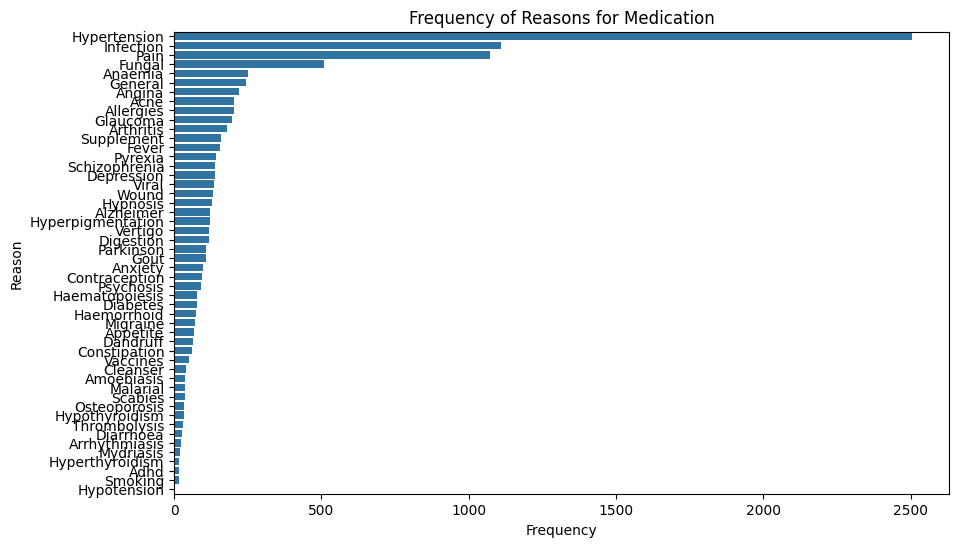

In [6]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='Reason', data=df, order=df['Reason'].value_counts().index)
plt.title('Frequency of Reasons for Medication')
plt.xlabel('Frequency')
plt.ylabel('Reason')
plt.show()


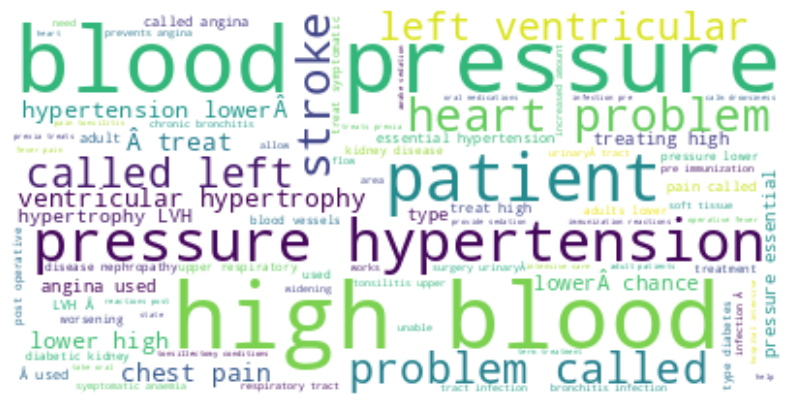

In [7]:
from wordcloud import WordCloud

desc_string = " ".join(description for description in df['Description'].dropna())
wordcloud = WordCloud(background_color='white').generate(desc_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['Description']

,Description
0,Mild to moderate acne (spots)
1,A RET 0.025% is a prescription medicine that i...
2,It is used to treat acne vulgaris in people 12...
3,It is used to treat acne vulgaris in people 12...
4,treat the most severe form of acne (nodular ac...
...,...
9715,used for treating warts
9716,used to soften the skin cells
9717,used for scars
9718,used for wounds


In [11]:
df['Description'].apply(lambda x:x.split())

,Description
0,"[Mild, to, moderate, acne, (spots)]"
1,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,"[treat, the, most, severe, form, of, acne, (no..."
...,...
9715,"[used, for, treating, warts]"
9716,"[used, to, soften, the, skin, cells]"
9717,"[used, for, scars]"
9718,"[used, for, wounds]"


In [12]:
df['Reason'] = df['Reason'].apply(lambda x:x.split())
df['Description'] = df['Description'].apply(lambda x:x.split())

In [13]:
df['Description'] = df['Description'].apply(lambda x:[i.replace(" ","") for i in x])

In [14]:
df['tags'] = df['Description'] + df['Reason']

In [15]:
new_df = df[['index','Drug_Name','tags']]

In [16]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [17]:
new_df['tags'].apply(lambda x:" ".join(x))

,tags
0,Mild to moderate acne (spots) Acne
1,A RET 0.025% is a prescription medicine that i...
2,It is used to treat acne vulgaris in people 12...
3,It is used to treat acne vulgaris in people 12...
4,treat the most severe form of acne (nodular ac...
...,...
9715,used for treating warts Wound
9716,used to soften the skin cells Wound
9717,used for scars Wound
9718,used for wounds Wound


In [18]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,"[Mild, to, moderate, acne, (spots), Acne]"
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,"[A, RET, 0.025%, is, a, prescription, medicine..."
2,3,ACGEL CL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
3,4,ACGEL NANO Gel 15gm,"[It, is, used, to, treat, acne, vulgaris, in, ..."
4,5,Acleen 1% Lotion 25ml,"[treat, the, most, severe, form, of, acne, (no..."
...,...,...,...
9715,9716,T Muce Ointment 5gm,"[used, for, treating, warts, Wound]"
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,"[used, to, soften, the, skin, cells, Wound]"
9717,9718,Wokadine M Onit 10gm,"[used, for, scars, Wound]"
9718,9719,Wound Fix Solution 100ml,"[used, for, wounds, Wound]"


In [19]:
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

In [20]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,Mild to moderate acne (spots) Acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,A RET 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,It is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts Wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells Wound
9717,9718,Wokadine M Onit 10gm,used for scars Wound
9718,9719,Wound Fix Solution 100ml,used for wounds Wound


In [21]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

In [22]:
new_df

,index,Drug_Name,tags
0,1,A CN Gel(Topical) 20gmA CN Soap 75gm,mild to moderate acne (spots) acne
1,2,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,a ret 0.025% is a prescription medicine that i...
2,3,ACGEL CL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
3,4,ACGEL NANO Gel 15gm,it is used to treat acne vulgaris in people 12...
4,5,Acleen 1% Lotion 25ml,treat the most severe form of acne (nodular ac...
...,...,...,...
9715,9716,T Muce Ointment 5gm,used for treating warts wound
9716,9717,Wokadine 10% Solution 100mlWokadine Solution 5...,used to soften the skin cells wound
9717,9718,Wokadine M Onit 10gm,used for scars wound
9718,9719,Wound Fix Solution 100ml,used for wounds wound


In [23]:
import nltk

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',max_features=5000)

In [26]:
def stem(text):
  y = []

  for i in text.split():
    y.append(ps.stem(i))

  return " ".join(y)

In [27]:
new_df['tags'] = new_df['tags'].apply(stem)

In [28]:
cv.fit_transform(new_df['tags']).toarray().shape

(9720, 806)

In [29]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [30]:
cv.get_feature_names_out()

array(['025', '12', '16', '18', 'abdomin', 'abl', 'ach', 'acid', 'acn',
       'acne', 'acquir', 'action', 'activ', 'acut', 'acute', 'adequ',
       'adhd', 'adjunct', 'adolesc', 'adult', 'adults', 'affect', 'ag',
       'age', 'aids', 'allerg', 'allergen', 'allergi', 'allow', 'alon',
       'alzheim', 'alzheimer', 'alzheimerâ', 'amoebiasi', 'anaemia',
       'anal', 'angina', 'angl', 'ani', 'ankylos', 'anorexia', 'anoth',
       'anti', 'antioxid', 'antipsychot', 'antiretrovir', 'anxieti',
       'anxiou', 'anxious', 'apnoea', 'appear', 'appetit', 'appetite',
       'appli', 'appropri', 'area', 'arrhythmia', 'arrhythmiasi',
       'arteri', 'arthralgia', 'arthriti', 'associ', 'atherothrombot',
       'athleteâ', 'atop', 'atrial', 'attack', 'awak', 'b1', 'b2', 'b3',
       'b5', 'b6', 'babi', 'backache', 'bacteri', 'bacteria', 'balanc',
       'balanitis', 'bandag', 'becom', 'behaviour', 'beliefs', 'benefit',
       'beta', 'biliari', 'biotin', 'bite', 'blackhead', 'blackheads',
      

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
cosine_similarity(vectors)

array([[1.        , 0.25197632, 0.43643578, ..., 0.        , 0.        ,
        0.        ],
       [0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
        0.0860663 ],
       [0.43643578, 0.25660012, 1.        , ..., 0.11111111, 0.0860663 ,
        0.0993808 ],
       ...,
       [0.        , 0.19245009, 0.11111111, ..., 1.        , 0.77459667,
        0.2981424 ],
       [0.        , 0.1490712 , 0.0860663 , ..., 0.77459667, 1.        ,
        0.34641016],
       [0.        , 0.0860663 , 0.0993808 , ..., 0.2981424 , 0.34641016,
        1.        ]])

In [33]:
similarity = cosine_similarity(vectors)

In [43]:
similarity.shape

(9720, 9720)

In [34]:
similarity[1]

array([0.25197632, 1.        , 0.25660012, ..., 0.19245009, 0.1490712 ,
       0.0860663 ])

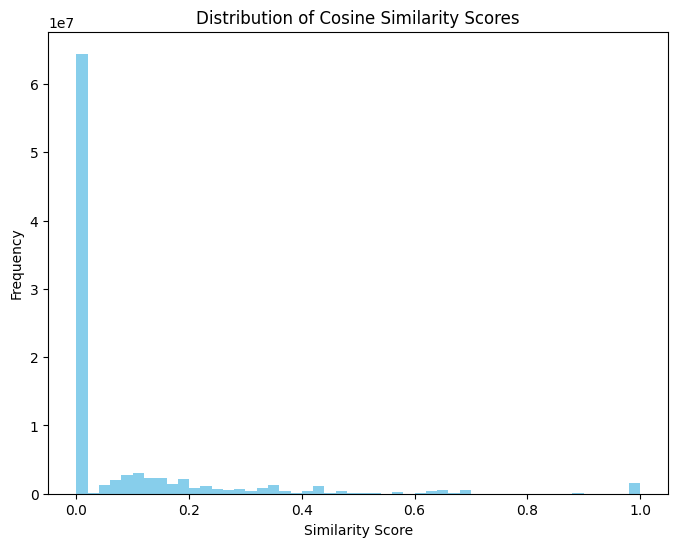

In [37]:
similarity_scores = similarity.flatten()
plt.figure(figsize=(8, 6))
plt.hist(similarity_scores, bins=50, color='skyblue')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()


In [46]:
def get_top_similar_medications(similarity_matrix, df, threshold=0.5, top_n=10):

    similar_pairs = np.argwhere(similarity_matrix > threshold)
    similar_pairs = similar_pairs[similar_pairs[:, 0] != similar_pairs[:, 1]]

    sorted_pairs = sorted(similar_pairs, key=lambda x: similarity_matrix[x[0], x[1]], reverse=True)

    top_pairs = []
    for (idx1, idx2) in sorted_pairs[:top_n]:
        med1_name = df.loc[idx1, 'Drug_Name']
        med2_name = df.loc[idx2, 'Drug_Name']
        score = similarity_matrix[idx1, idx2]
        top_pairs.append((med1_name, med2_name, score))

    return top_pairs

top_similar_medications = get_top_similar_medications(similarity, new_df, threshold=0.8, top_n=10)
for med1, med2, score in top_similar_medications:
    print(f"{med1} and {med2} have a similarity score of {score:.2f}")


Acne Aid Bar 50gmAcne Aid Bar 100gm and Acne UV Gel 60gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Acnerex Soap 75gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Acneril 1% Gel 10gmAcneril Tablet 10Acneril 0.10% Cream 20gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Acnezyl Gel(Topical) 10gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Acnicin Gel 15gmAcnicin 1/1% Solution 25ml have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Aczit 10mg Softgel 10'S have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Adabor Gel 15gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Ahaglow Acne Control Moisturizing Gel 50gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Airet 0.50% Cream 15gmAiret 0.10% Cream 15gm have a similarity score of 1.00
Acne Aid Bar 50gmAcne Aid Bar 100gm and Alonurish Anti Acne

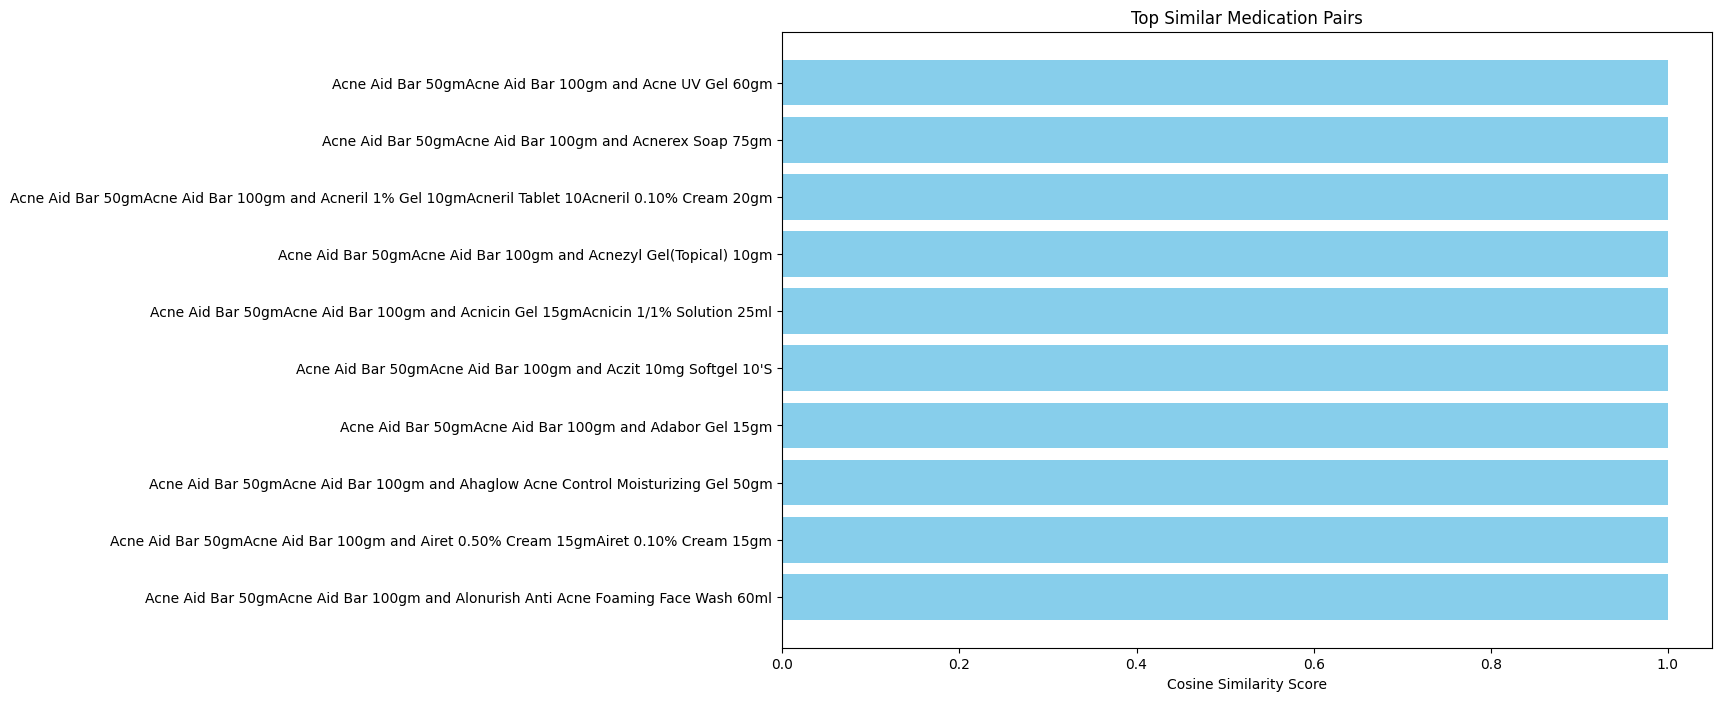

In [47]:
import matplotlib.pyplot as plt

medications, scores = zip(*[(f"{med1} and {med2}", score) for med1, med2, score in top_similar_medications])

plt.figure(figsize=(12, 8))
plt.barh(medications, scores, color='skyblue')
plt.xlabel('Cosine Similarity Score')
plt.title('Top Similar Medication Pairs')
plt.gca().invert_yaxis()
plt.show()


In [35]:
def recommend(medicine):
    medicine_index = new_df[new_df['Drug_Name'] == medicine].index[0]
    distances = similarity[medicine_index]
    medicines_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]

    for i in medicines_list:
        print(new_df.iloc[i[0]].Drug_Name)

In [48]:
recommend("Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S")

Oxypamol D Tablet 10'S
Pacimol MF Tablet 10'S
Painil Plus 100/500mg Tablet 10'S
Pamagin Plus Gel 30gm
Paracetamol 125mg Syrup 60mlParacetamol 500mg Tablet 10'S
